This notebook desined for tabular classification tasks with pandas and scikit-learn.
It is a simple example of how to use pandas and scikit-learn to build a classification model using a tabular dataset. The code includes data preprocessing, model training, and evaluation steps.
The dataset used in this example is the bank marketing dataset from the UCI Machine Learning Repository. The dataset contains information about a bank's marketing campaign and whether or not a customer subscribed to a term deposit.
The goal is to predict whether a customer will subscribe to a term deposit based on their demographic and behavioral features.


In [2]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
data=pd.read_csv('/home/tisinr/MEGA/Dev/models/classifier/dataset/bank.csv',header=0, sep=';')
# Display the first few rows of the dataset
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [4]:
data.replace('unknown', pd.NA, inplace=True)

In [5]:
data.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

Exploratory Data Analysis with Pandas

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [47]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


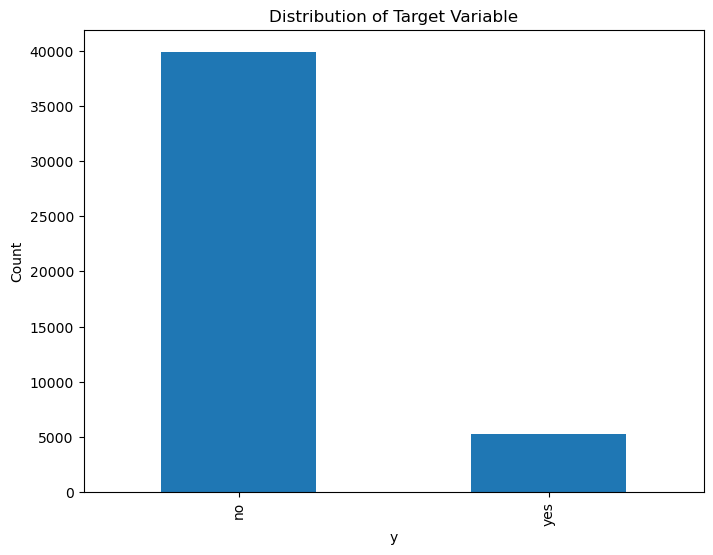

In [55]:
#Distribution plot of target variable
plt.figure(figsize=(8, 6))
data['y'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()



In [58]:
##category distribution
data['job'].value_counts()/len(data)*100


job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
Name: count, dtype: float64

In [ ]:
# Convert labels to integers (0, 1, ...)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


In [73]:
# Fill missing values with a placeholder (e.g., 'missing') before encoding
data_filled = data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']].fillna('missing')

# Convert to one-hot encoded format
encoder = OneHotEncoder()
data_encoded = encoder.fit_transform(data_filled).toarray()


In [82]:
# Convert the encoded data back to a DataFrame
data_encoded_df = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(data_filled.columns))
# Concatenate the encoded data with the original DataFrame
data_encoded_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_missing,job_retired,job_self-employed,job_services,job_student,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_missing,poutcome_other,poutcome_success
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
45207,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
45208,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [84]:
data_encoded_df.head

<bound method NDFrame.head of        job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0             0.0              0.0               0.0            0.0   
1             0.0              0.0               0.0            0.0   
2             0.0              0.0               1.0            0.0   
3             0.0              1.0               0.0            0.0   
4             0.0              0.0               0.0            0.0   
...           ...              ...               ...            ...   
45206         0.0              0.0               0.0            0.0   
45207         0.0              0.0               0.0            0.0   
45208         0.0              0.0               0.0            0.0   
45209         0.0              1.0               0.0            0.0   
45210         0.0              0.0               1.0            0.0   

       job_management  job_missing  job_retired  job_self-employed  \
0                 1.0          0.0          0.0

In [77]:
data_encoded.view()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]], shape=(45211, 44))

In [70]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
X=data.drop(columns=['y'])
y=data['y']
print(X.shape)
print(y.shape)

(45211, 16)
(45211,)


In [ ]:
data['y'].value_counts()

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,stratify=y,random_state=78)

In [41]:
y_test.shape

(9043,)

In [36]:
X_train.shape

(36168, 16)

In [42]:
y_train.shape

(36168,)

In [43]:
X_test.info


<bound method DataFrame.info of        age          job   marital  education default  balance housing loan  \
14194   32     services    single  secondary      no        0      no  yes   
43032   38     services   married  secondary      no      775      no   no   
21988   47     services   married  secondary      no      439     yes   no   
34758   36     services   married  secondary      no        0     yes   no   
7219    26     services   married  secondary      no      611     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
32735   36   management   married   tertiary      no     -196     yes  yes   
17017   46     services   married    primary      no      860      no   no   
12683   36     services   married  secondary      no      -27     yes  yes   
19056   59  blue-collar  divorced    primary      no      153      no   no   
29750   43   unemployed    single    primary      no      264      no   no   

        contact  day month  dur

y
no     39922
yes     5289
Name: count, dtype: int64